#  <font color='green' size=5> Assignment #2
</font> 

**Time Series Analysis** <br>
**ANLT 207** <br>
**November 18, 2018** <br>
<br>

<font color='green' size=4> By: Ali Taheri</font>

##  <font color='blue' size=4> Number 1 </font>

In [198]:
# use a Plynomia model to detrend a time series
from pandas import read_csv
from pandas import datetime
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from matplotlib import pyplot
import numpy

from statsmodels.tsa.stattools import adfuller

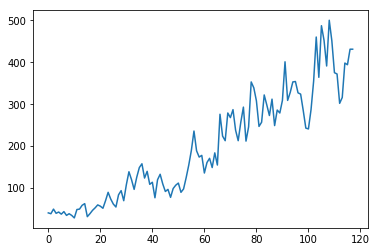

In [210]:
#Reading time series 
series = read_csv('robberies.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

y=series.values
pyplot.plot(y)
pyplot.show()

##  <font color='blue' size=4> 1.a </font>

In [199]:
result = adfuller(y)

print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistics: 1.001102
p-value: 0.994278
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


The p-value shows this time series is not stationary.

##  <font color='blue' size=4> 1.b </font>

In [207]:
#Making index of series
x = [i for i in range(0, len(series))]

#A for loop to trying different orders of polynomial from 1 to 3
for degree in range(1,4):
    coeff = numpy.polyfit(x,y,degree)
    
    # create curve
    curve = list()
    for i in range(len(x)):
	    value = coeff[-1]
	    for d in range(degree):
		    value += x[i]**(degree-d) * coeff[d]
	    curve.append(value)
        
    # detrend
    detrended = [y[i]-curve[i] for i in range(0, len(series))]
    
    result = adfuller(detrended)
    if result[1] < 0.05 :
        break
        
if result[1] < 0.05:
    print("By fitting a polynomial curve of order %d and subtraction, detrended time series would be stationary." \
         % polynomial_degree)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key,value))
    
else:
    print("There is not any polynomial fit up to order 3 for detrending this time series to be stationary.")
    

There is not any polynomial fit up to order 3 for detrending this time series to be stationary.


##  <font color='blue' size=4> 1.c </font>

In [209]:
#Making index of series
x = [i for i in range(0, len(series))]

#A for loop to trying different orders of polynomial from 1 to 10
for degree in range(1,20):
    coeff = numpy.polyfit(x,y,degree)
    
    # create curve
    curve = list()
    for i in range(len(x)):
	    value = coeff[-1]
	    for d in range(degree):
		    value += x[i]**(degree-d) * coeff[d]
	    curve.append(value)
        
    # detrend
    detrended = [y[i]-curve[i] for i in range(0, len(series))]
    
    result = adfuller(detrended)
    if result[1] < 0.05 :
        break
        
if result[1] < 0.05:
    print("By fitting a polynomial curve of order %d and subtraction, detrended time series would be stationary." \
         % polynomial_degree)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key,value))
    
else:
    print("There is not any polynomial fit up to order 3 for detrending this time series to be stationary.")
    

By fitting a polynomial curve of order 8 and subtraction, detrended time series would be stationary.
ADF Statistics: -2.951663
p-value: 0.039662
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


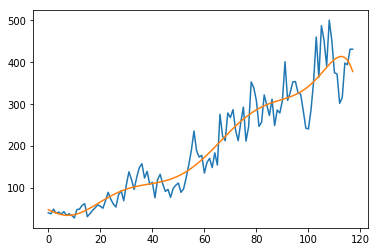

In [211]:
pyplot.plot(y)
pyplot.plot(curve)
pyplot.show()

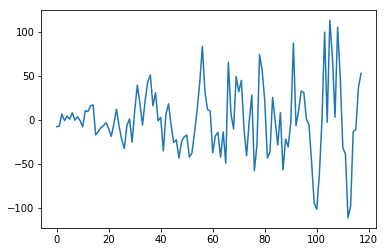

In [214]:
pyplot.plot(detrended)
pyplot.show()

##  <font color='blue' size=4> 1.d </font>

In [215]:
diff = list()

for i in range(1, len(y)):
    value = y[i] - y[i - 1]
    diff.append(value)
    
result = adfuller(diff)

print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistics: -7.428564
p-value: 0.000000
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


Resulted time series is stationary based on p-value.

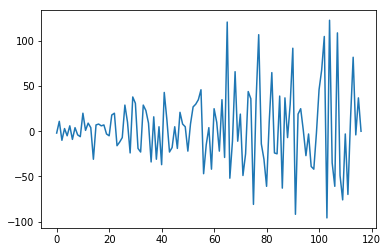

In [216]:
pyplot.plot(diff)
pyplot.show()

##  <font color='blue' size=4> 1.e </font>

Fortonately at first level of differencing it worked very good and is stationary.

##  <font color='blue' size=4> Number 2 </font>

In [218]:
#Reading time series 
series = read_csv('champagne.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
y=series.values

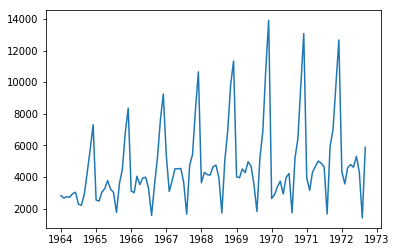

In [219]:
pyplot.plot(series)
pyplot.show()

Above diagram shows a seasonality with period of 1 year.

##  <font color='blue' size=4> 2.a </font>

In [220]:
result = adfuller(y)

print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistics: -1.833593
p-value: 0.363916
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584


The p-value shows our series is not stationary.

##  <font color='blue' size=4> 2.b </font>

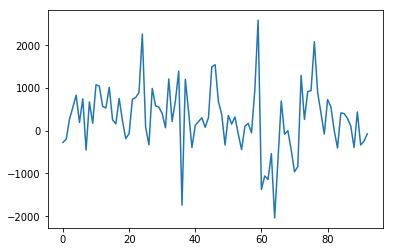

In [221]:
diff = list()


months_in_year = 12
for i in range(months_in_year, len(series)):
    #differencing for period of 12 months
    value = y[i] - y[i-12]
    diff.append(value)
    
pyplot.plot(diff)
pyplot.show()

##  <font color='blue' size=4> 2.c </font>

In [222]:
result = adfuller(diff)

print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistics: -7.626619
p-value: 0.000000
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584


The p-value shows that our resulting series is stationary now.

##  <font color='blue' size=4> 2.d </font>

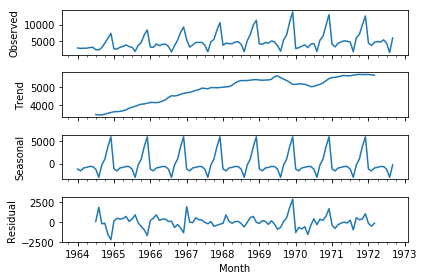

In [223]:
result = seasonal_decompose(series , model='additive' , freq= 12)
result.plot()
pyplot.show()

##  <font color='blue' size=4> 2.e </font>

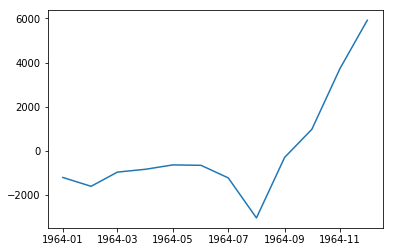

In [224]:
seas=result.seasonal
pyplot.plot(seas[0:12])

##  <font color='blue' size=4> Number 3 </font>

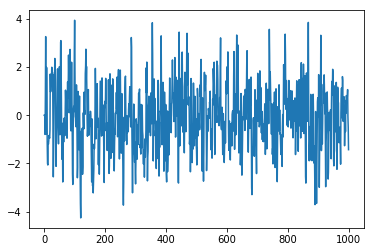

In [225]:
#Reading time series
series = read_csv('series.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
y=series.values

pyplot.plot(y)
pyplot.show()

In [226]:
result = adfuller(y)

print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistics: -13.885414
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


Time series is stationary, so we could plot ACF and PACF diagrams.

##  <font color='blue' size=4> 3.a </font>

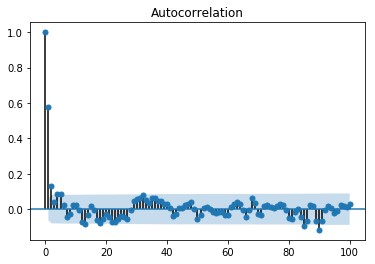

In [227]:
plot_acf(y,lags=100)
pyplot.show()

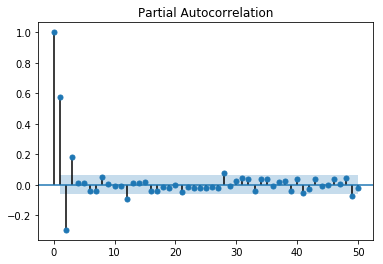

In [228]:
plot_pacf(y,lags=50)
pyplot.show()

ACF diagram is alternating positive and negative and it is decaying to zero, so it could be Autoregressive series. It’s PACF graph shows a cut-off after 3 spikes, so it could be AR(3), so p=3.

##  <font color='blue' size=4> 3.b </font>

In [107]:
#Finding 3 first ACF's
ACF=acf(y)
ru1=ACF[1]
ru2=ACF[2]
ru3=ACF[3]

#Construction of required matrices
denominator = numpy.array([[1,ru1,ru2],[ru1,1,ru1],(ru2,ru1,1)])
numerator_1 = numpy.array([[ru1,ru1,ru2],[ru2,1  ,ru1],(ru3,ru1,  1)])
numerator_2 = numpy.array([[1  ,ru1,ru2],[ru1,ru2,ru1],(ru2,ru3,  1)])
numerator_3 = numpy.array([[1,  ru1,ru1],[ru1,1  ,ru2],(ru2,ru1,ru3)])

#Applying cramer's rule
a1 = numpy.linalg.det(numerator_1) / numpy.linalg.det(denominator)
a2 = numpy.linalg.det(numerator_2) / numpy.linalg.det(denominator)
a3 = numpy.linalg.det(numerator_3) / numpy.linalg.det(denominator)

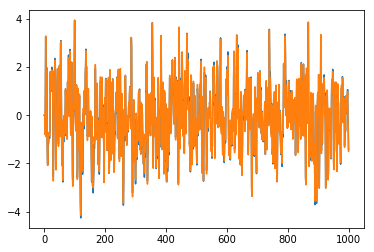

In [118]:
#Simulation to see behavoius of time series with mentioned coefficients

n=1000
numpy.random.seed(57)
variance=1

stdev=numpy.sqrt(variance)
e=numpy.random.normal(0,stdev,size=n)
y_sim=numpy.zeros_like(e)

for t in range(3,n):
    y_sim[t]=a1*y_sim[t-1]+a2*y_sim[t-2]+a3*y_sim[t-3]+e[t]

pyplot.plot(y)
pyplot.plot(y_sim)
pyplot.show()

It seems that time series has been generated by seed of 57 too! It's a great coincedence. 

In [230]:
print('Calculated coefficients based on ACF values:')
print("a1=",round(a1,2))
print("a2=",round(a2,2))
print("a3=",round(a3,2))

Calculated coefficients based on ACF values:
a1= 0.8
a2= -0.43
a3= 0.18


##  <font color='blue' size=4> Number 4 </font>

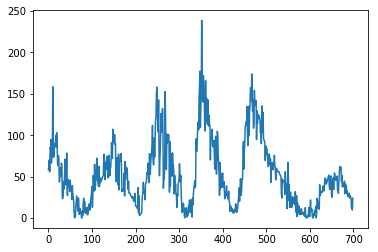

In [232]:
#Reading Series
series = read_csv('sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
y=series.values

#Plotting series
pyplot.plot(y[0:700])
pyplot.show()

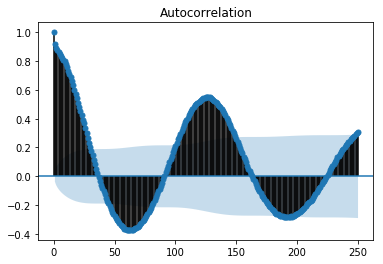

In [233]:
#Plotting ACF
plot_acf(y,lags=250)
pyplot.show()

In [235]:
#Listing ACF values
ACF=list(acf(y , nlags =250))

#Finding index of first minimum month between 50 and 100
first_min = ACF.index(min(ACF[50:100]))
#Finding index of second minimum month between 150 and 200
second_min = ACF.index(min(ACF[120:240]))

#Perid is difference of stated minimums
period = second_min - first_min
print("The sunspot cycle is %d months." % period)

The sunspot cycle is 130 months.
